In [181]:
Area = ['Europe','Africa','North America','Oceania','Asia','South America','China','United Kingdom','India','Japan','Australia']

In [182]:
import pandas as pd
import matplotlib.pyplot as plt

In [183]:

#data = pd.read_csv(f'../data/final_rate_{area}.csv')

In [184]:
Europe = pd.read_csv(f'data/final_rate_{Area[0]}.csv')
Europe['MIN(collection_date)'] = pd.to_datetime(Europe['MIN(collection_date)'])

Africa = pd.read_csv(f'data/final_rate_{Area[1]}.csv')
Africa['MIN(collection_date)'] = pd.to_datetime(Africa['MIN(collection_date)'])


North_America = pd.read_csv(f'data/final_rate_{Area[2]}.csv')
North_America['MIN(collection_date)'] = pd.to_datetime(North_America['MIN(collection_date)'])

Oceania = pd.read_csv(f'data/final_rate_{Area[3]}.csv')
Oceania['MIN(collection_date)'] = pd.to_datetime(Oceania['MIN(collection_date)'])

Asia = pd.read_csv(f'data/final_rate_{Area[4]}.csv')
Asia['MIN(collection_date)'] = pd.to_datetime(Asia['MIN(collection_date)'])

South_America = pd.read_csv(f'data/final_rate_{Area[5]}.csv')
South_America['MIN(collection_date)'] = pd.to_datetime(South_America['MIN(collection_date)'])


In [185]:
Europe.head()

,Unnamed: 0,Lineage,parent,MIN(collection_date),parent_date,gap,N,M,S,E
0,0,B.1.637.1,B.1.637,2021-09-21,2020-05-29,480,0.000217,0.000261,0.000301,0.000342
1,1,AY.46.6.1,AY.46.6,2021-10-17,2020-08-11,432,0.000000,0.000000,0.000000,0.000000
2,2,AY.29.1,AY.29,2021-03-09,2021-01-28,40,0.000000,0.000000,0.000000,0.000000
3,3,AY.29.2,AY.29,2021-07-16,2021-01-28,169,0.000000,0.000000,0.000000,0.000000
4,4,B.1.240.1,B.1.240,2020-08-04,2020-03-22,135,0.000837,0.000852,0.001061,0.000871


In [186]:
top = len(Europe)
Lineage = Europe['Lineage'][:top]
date = Europe['MIN(collection_date)'][:top]
N = Europe['N'][:top]
E = Europe['E'][:top]
S = Europe['S'][:top]
M = Europe['M'][:top]

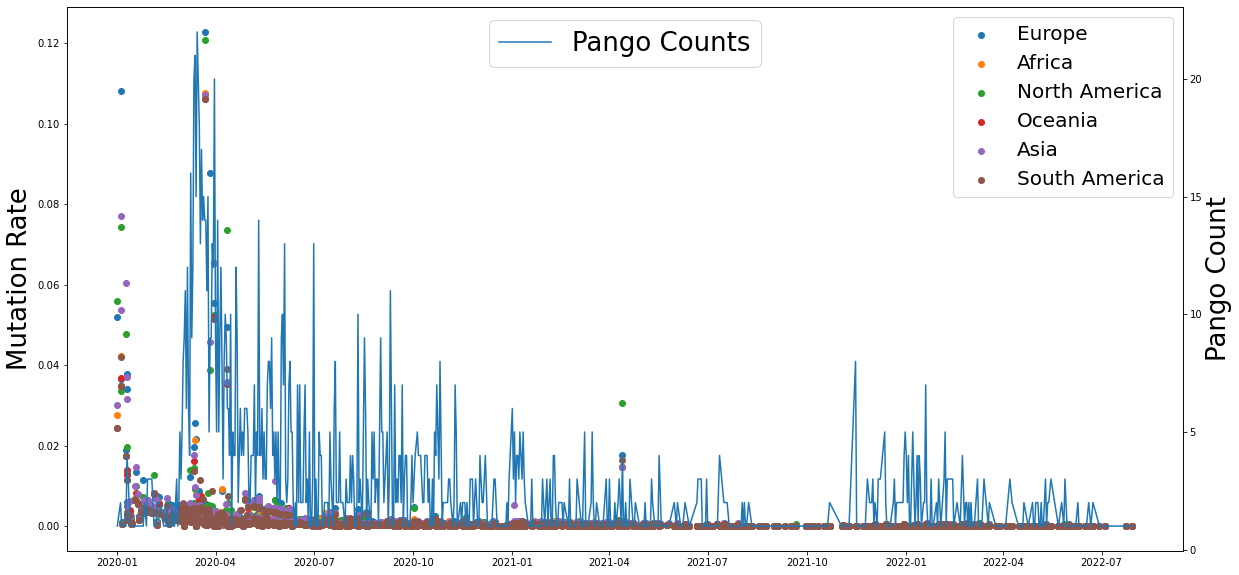

In [189]:
fig, ax = plt.subplots(figsize=(20,10))

l1=ax.scatter(date, Europe['S'],label='Europe')
l2=ax.scatter(date,Africa['S'],label='Africa')
l3=ax.scatter(date,North_America['S'],label='North America')
l4=ax.scatter(date,Oceania['S'],label='Oceania')
l5=ax.scatter(date,Asia['S'],label='Asia')
l6=ax.scatter(date,South_America['S'],label='South America')
ax.set_ylabel('Mutation Rate',fontsize=26)
plt.legend(fontsize=20)
#plt.title("S Protein Differ Area Mutation Rate",fontsize=26)

# lines = l1+l2+l3+l4+l5+l6
# labs = [label.get_label() for label in lines]
# ax1.legend(lines,labs,fontsize=26)

ax2 = ax.twinx()
vc = Europe['MIN(collection_date)'].value_counts().sort_index()
pd_vc = pd.DataFrame([],columns=['date','counts'])
pd_vc['date'] = pd.to_datetime(vc.index)
pd_vc['counts'] = vc.values
l11=plt.plot(pd_vc['date'],pd_vc['counts'],label='Pango Counts')
ax2.set_ylabel('Pango Count',fontsize=26)
lines = l11
labs = [label.get_label() for label in lines]
ax2.legend(lines,labs,fontsize=26,loc='upper center')
plt.savefig('fig1.jpg',dpi=200)
plt.show()

In [25]:
#'Europe','Africa','North America','Oceania','Asia'
df_corr = pd.DataFrame([])
protein = 'S'
df_corr['Europe'] = Europe[protein]
df_corr['Africa'] = Africa[protein]
df_corr['North_America'] = North_America[protein]
df_corr['Oceania'] = Oceania[protein]
df_corr['Asiaa'] = Asia[protein]

,N,M,S,E
N,1.000000,0.975173,0.864867,0.978719
M,0.975173,1.000000,0.784139,0.980202
S,0.864867,0.784139,1.000000,0.864430
E,0.978719,0.980202,0.864430,1.000000


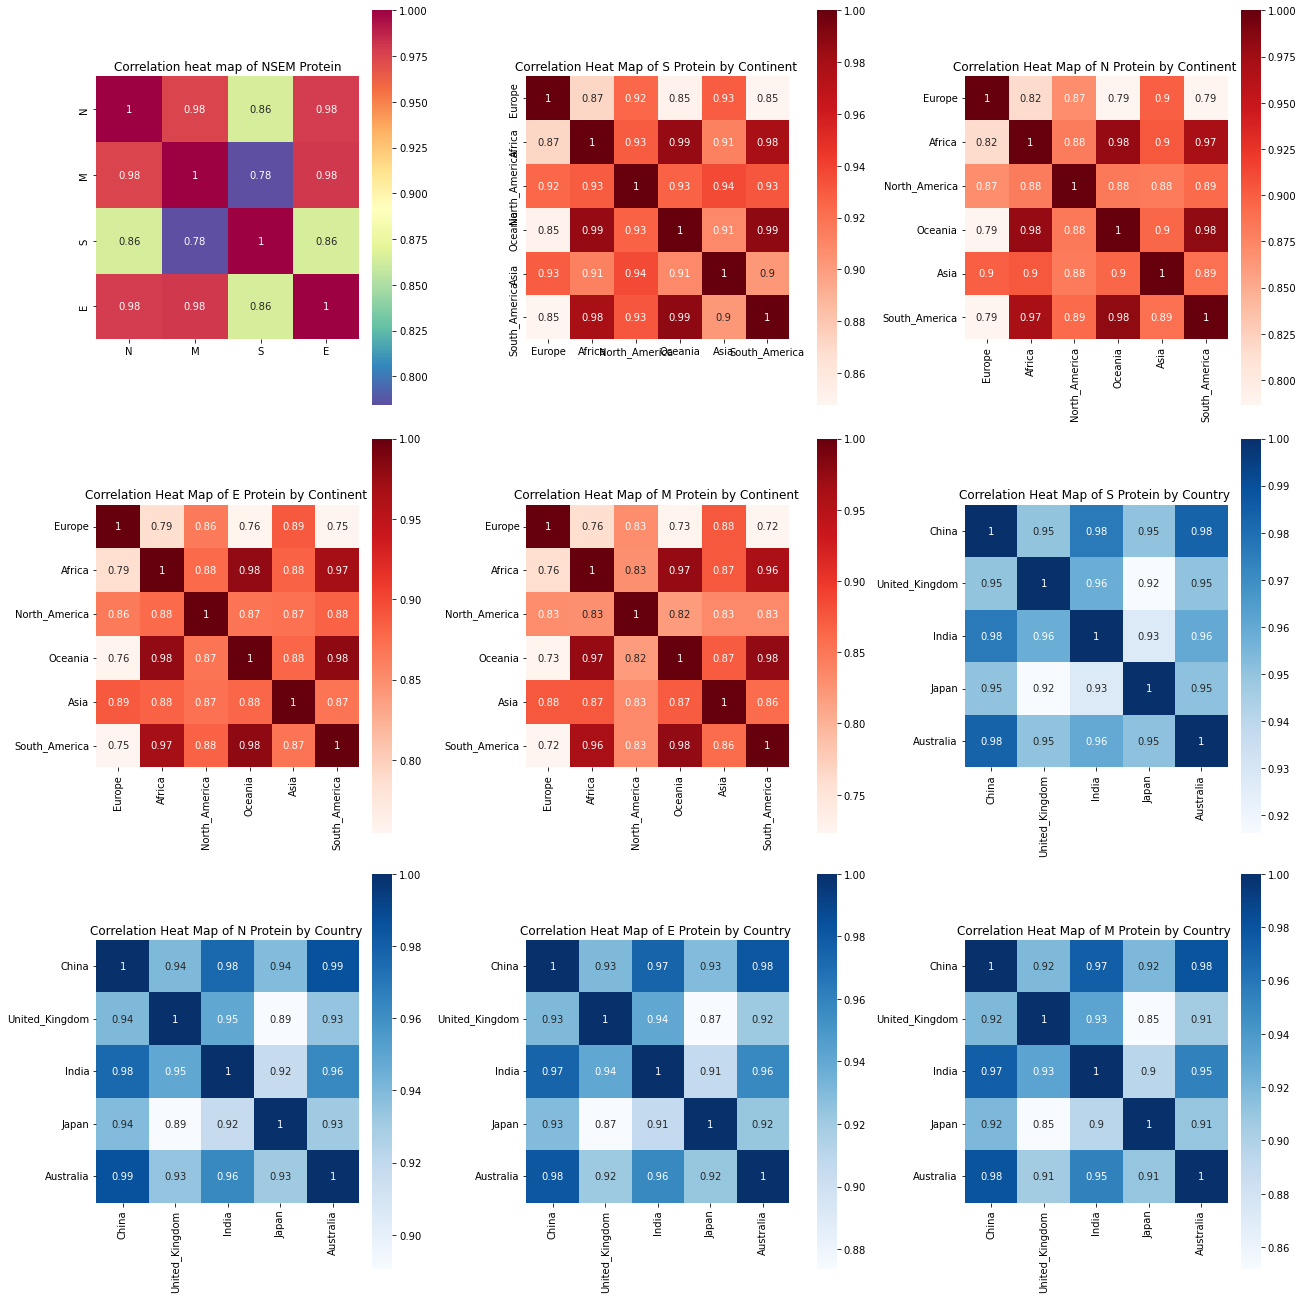

In [89]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
fig, ax = plt.subplots(3,3,constrained_layout=True,figsize=(18, 18),facecolor='w')

ax0 = plt.subplot(3,3,1)
data_mu = pd.read_csv('data/final_rate.csv')
df_corr = data_mu[['N','M','S','E']]
sns.heatmap(df_corr.corr(),annot=True, vmax=1, square=True, cmap="Spectral_r", fmt='.2g',ax=ax0)
plt.title('Correlation heat map of NSEM Protein')

ax1 = plt.subplot(3,3,2)
#ax2 = plt.subplot(2,2,2)
# v
# 指定颜色带的色系
df_corr = pd.DataFrame([])
protein = 'S'
df_corr['Europe'] = Europe[protein]
df_corr['Africa'] = Africa[protein]
df_corr['North_America'] = North_America[protein]
df_corr['Oceania'] = Oceania[protein]
df_corr['Asia'] = Asia[protein]
df_corr['South_America'] = South_America[protein]
#South_America
sns.heatmap(df_corr.corr(),annot=True, vmax=1, square=True, cmap="Reds", fmt='.2g',ax=ax1)
plt.title(f'Correlation Heat Map of {protein} Protein by Continent ')

ax2 = plt.subplot(3,3,3)
df_corr = pd.DataFrame([])
protein = 'N'
df_corr['Europe'] = Europe[protein]
df_corr['Africa'] = Africa[protein]
df_corr['North_America'] = North_America[protein]
df_corr['Oceania'] = Oceania[protein]
df_corr['Asia'] = Asia[protein]
df_corr['South_America'] = South_America[protein]
sns.heatmap(df_corr.corr(),annot=True, vmax=1, square=True, cmap="Reds", fmt='.2g',ax=ax2)
plt.title(f'Correlation Heat Map of {protein} Protein by Continent ')


ax2 = plt.subplot(3,3,4)
df_corr = pd.DataFrame([])
protein = 'E'
df_corr['Europe'] = Europe[protein]
df_corr['Africa'] = Africa[protein]
df_corr['North_America'] = North_America[protein]
df_corr['Oceania'] = Oceania[protein]
df_corr['Asia'] = Asia[protein]
df_corr['South_America'] = South_America[protein]
sns.heatmap(df_corr.corr(),annot=True, vmax=1, square=True, cmap="Reds", fmt='.2g',ax=ax2)
plt.title(f'Correlation Heat Map of {protein} Protein by Continent ')


ax2 = plt.subplot(3,3,5)
df_corr = pd.DataFrame([])
protein = 'M'
df_corr['Europe'] = Europe[protein]
df_corr['Africa'] = Africa[protein]
df_corr['North_America'] = North_America[protein]
df_corr['Oceania'] = Oceania[protein]
df_corr['Asia'] = Asia[protein]
df_corr['South_America'] = South_America[protein]
sns.heatmap(df_corr.corr(),annot=True, vmax=1, square=True, cmap="Reds", fmt='.2g',ax=ax2)
plt.title(f'Correlation Heat Map of {protein} Protein by Continent ')

#country = ['China','United Kingdom','India','Japan','Australia']
ax2=plt.subplot(3,3,6)

df_corr = pd.DataFrame([])
protein = 'S'
df_corr['China'] = China[protein]
df_corr['United_Kingdom'] = United_Kingdom[protein]
df_corr['India'] = India[protein]
df_corr['Japan'] = Japan[protein]
df_corr['Australia'] = Australia[protein]
sns.heatmap(df_corr.corr(),annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g',ax=ax2)
plt.title(f'Correlation Heat Map of {protein} Protein by Country ')

ax2=plt.subplot(3,3,7)

df_corr = pd.DataFrame([])
protein = 'N'
df_corr['China'] = China[protein]
df_corr['United_Kingdom'] = United_Kingdom[protein]
df_corr['India'] = India[protein]
df_corr['Japan'] = Japan[protein]
df_corr['Australia'] = Australia[protein]
sns.heatmap(df_corr.corr(),annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g',ax=ax2)
plt.title(f'Correlation Heat Map of {protein} Protein by Country ')
ax2=plt.subplot(3,3,8)
df_corr = pd.DataFrame([])
protein = 'E'
df_corr['China'] = China[protein]
df_corr['United_Kingdom'] = United_Kingdom[protein]
df_corr['India'] = India[protein]
df_corr['Japan'] = Japan[protein]
df_corr['Australia'] = Australia[protein]
sns.heatmap(df_corr.corr(),annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g',ax=ax2)
plt.title(f'Correlation Heat Map of {protein} Protein by Country ')
ax2=plt.subplot(3,3,9)
df_corr = pd.DataFrame([])
protein = 'M'
df_corr['China'] = China[protein]
df_corr['United_Kingdom'] = United_Kingdom[protein]
df_corr['India'] = India[protein]
df_corr['Japan'] = Japan[protein]
df_corr['Australia'] = Australia[protein]
sns.heatmap(df_corr.corr(),annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g',ax=ax2)
plt.title(f'Correlation Heat Map of {protein} Protein by Country ')

plt.savefig('heapmap.png',dpi=200)

plt.show()

In [71]:
country = ['China','United Kingdom','India','Japan','Australia']
China = pd.read_csv(f'data/final_rate_{country[0]}.csv')
China['MIN(collection_date)'] = pd.to_datetime(China['MIN(collection_date)'])

United_Kingdom = pd.read_csv(f'data/final_rate_{country[1]}.csv')
United_Kingdom['MIN(collection_date)'] = pd.to_datetime(United_Kingdom['MIN(collection_date)'])


India = pd.read_csv(f'data/final_rate_{country[2]}.csv')
India['MIN(collection_date)'] = pd.to_datetime(India['MIN(collection_date)'])

Japan = pd.read_csv(f'data/final_rate_{country[3]}.csv')
Japan['MIN(collection_date)'] = pd.to_datetime(Japan['MIN(collection_date)'])

Australia = pd.read_csv(f'data/final_rate_{country[4]}.csv')
Australia['MIN(collection_date)'] = pd.to_datetime(Australia['MIN(collection_date)'])

In [95]:
#country = ['China','United Kingdom','India','Japan','Australia']
Area = ['Europe','Africa','North America','Oceania','Asia','South America','China','United Kingdom','India','Japan','Australia']

In [96]:
len(Area)

11

In [97]:
Europe['tag'] = [Area[0] for i in range(len(Europe))]
Africa['tag'] = [Area[1] for i in range(len(Europe))]
North_America['tag'] = [Area[2] for i in range(len(Europe))]
Oceania['tag'] = [Area[3] for i in range(len(Europe))]
Asia['tag'] = [Area[4] for i in range(len(Europe))]
South_America['tag'] = [Area[5] for i in range(len(Europe))]
China['tag'] = [Area[6] for i in range(len(Europe))]
United_Kingdom['tag'] = [Area[7] for i in range(len(Europe))]
India['tag'] = [Area[8] for i in range(len(Europe))]
Japan['tag'] = [Area[9] for i in range(len(Europe))]
Australia['tag'] = [Area[10] for i in range(len(Europe))]

In [144]:
final_data = pd.concat([Europe,Africa,North_America,Oceania,Asia,South_America])
final_data_c = pd.concat([China,United_Kingdom,India,Japan,Australia])

In [145]:
final_data[['N','M','S','E','tag']]

,N,M,S,E,tag
0,0.000217,0.000261,0.000301,0.000342,Europe
1,0.000000,0.000000,0.000000,0.000000,Europe
2,0.000000,0.000000,0.000000,0.000000,Europe
3,0.000000,0.000000,0.000000,0.000000,Europe
4,0.000837,0.000852,0.001061,0.000871,Europe
...,...,...,...,...,...
1913,0.000000,0.000000,0.000000,0.000000,South America
1914,0.000000,0.000000,0.000000,0.000000,South America
1915,0.000000,0.000000,0.000000,0.000000,South America
1916,0.000268,0.000077,0.000151,0.000112,South America


In [106]:
from sklearn.manifold import TSNE
from sklearn import preprocessing


In [164]:
#country = ['China','United Kingdom','India','Japan','Australia']
Area_t = ['Europe','Africa','North_America','Oceania','Asia','South_America']
le = preprocessing.LabelEncoder()
c = ['China','United_Kingdom','India','Japan','Australia']
le.fit(Area_t)
label = le.fit_transform(final_data['tag'])

In [165]:
tsne_2d = TSNE(n_components=2,random_state=0)

In [166]:
result_2D = tsne_2d.fit_transform(final_data[['N','M','S','E']])
result_2D1 = tsne_2d.fit_transform(final_data_c[['N','M','S','E']])
le1 = preprocessing.LabelEncoder()
c = ['China','United_Kingdom','India','Japan','Australia']
le1.fit(c)
label1 = le1.fit_transform(final_data_c['tag'])

/home/wvdon/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/wvdon/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/wvdon/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/wvdon/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [168]:
len(result_2D[:,0])

11508

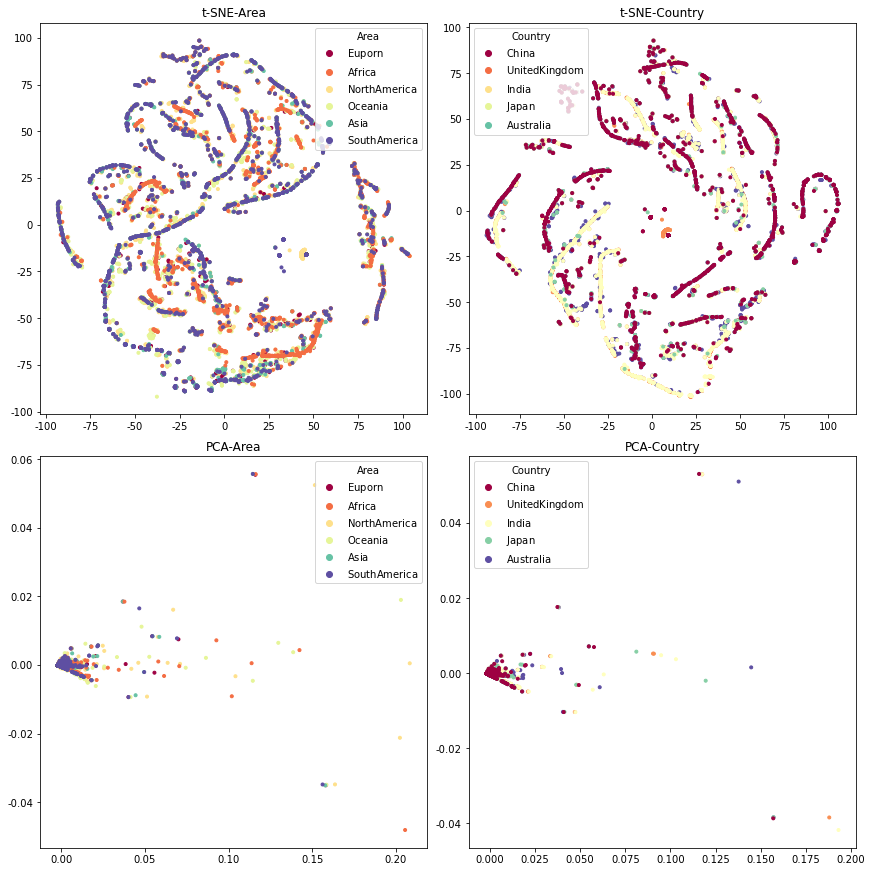

In [190]:
fig, ax = plt.subplots(2,2,constrained_layout=True,figsize=(12,12))
ax1 = plt.subplot(221)

scatter = ax1.scatter(result_2D[:,0],result_2D[:,1],marker='.',c=label,cmap=plt.cm.Spectral)
a,b = scatter.legend_elements()
b = ['$\\mathdefault{Euporn}$','$\\mathdefault{Africa}$','$\\mathdefault{North America}$','$\\mathdefault{Oceania}$',
     '$\\mathdefault{Asia}$','$\\mathdefault{South America}$','$\\mathdefault{China}$','$\\mathdefault{United Kingdom}$',
     '$\\mathdefault{India}$','$\\mathdefault{Japan}$','$\\mathdefault{Australia}$']
#['Europe','Africa','North_America','Oceania','Asia','South_America','China','United_Kingdom','India','Japan','Australia']
legend1= ax1.legend(a,b,title='Area',loc='best')
plt.title('t-SNE-Area')

ax2=plt.subplot(222)
scatter1 = ax2.scatter(result_2D1[:,0],result_2D1[:,1],marker='.',c=label1,cmap=plt.cm.Spectral)
a,b = scatter.legend_elements()
b = ['$\\mathdefault{China}$','$\\mathdefault{United Kingdom}$',
     '$\\mathdefault{India}$','$\\mathdefault{Japan}$','$\\mathdefault{Australia}$']
#['Europe','Africa','North_America','Oceania','Asia','South_America','China','United_Kingdom','India','Japan','Australia']
legend2= ax2.legend(a,b,title='Country',loc='upper left')
plt.title('t-SNE-Country')

ax3=plt.subplot(223)
newX = pca.fit_transform(final_data[['N','M','S','E']]) 
scatter = ax3.scatter(newX[:,0],newX[:,1],marker='.',c=label,cmap=plt.cm.Spectral)
a,b = scatter.legend_elements()
b = ['$\\mathdefault{Euporn}$','$\\mathdefault{Africa}$','$\\mathdefault{North America}$','$\\mathdefault{Oceania}$',
     '$\\mathdefault{Asia}$','$\\mathdefault{South America}$']
#['Europe','Africa','North_America','Oceania','Asia','South_America','China','United_Kingdom','India','Japan','Australia']
legend1= ax3.legend(a,b,title='Area',loc='best')
plt.title('PCA-Area')

ax4=plt.subplot(224)
newX = pca.fit_transform(final_data_c[['N','M','S','E']]) 
scatter = ax4.scatter(newX[:,0],newX[:,1],marker='.',c=label1,cmap=plt.cm.Spectral)
a,b = scatter.legend_elements()
b = ['$\\mathdefault{China}$','$\\mathdefault{United Kingdom}$',
     '$\\mathdefault{India}$','$\\mathdefault{Japan}$','$\\mathdefault{Australia}$']
#['Europe','Africa','North_America','Oceania','Asia','South_America','China','United_Kingdom','India','Japan','Australia']
legend1= ax4.legend(a,b,title='Country',loc='best')
plt.title('PCA-Country')

plt.savefig('t-SNE-PCA-Area-Country.png',dpi=200)
plt.show()

In [ ]:
Africa:12632483
Europe:229428467
Asia:181470620
North America:114354772
South America:64063612
Oceania:12251213
中国:6947684
英国:23621956
印度:44572243
日本:21067544
澳大利亚:10204195

/home/wvdon/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/wvdon/.conda/envs/pytorch/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


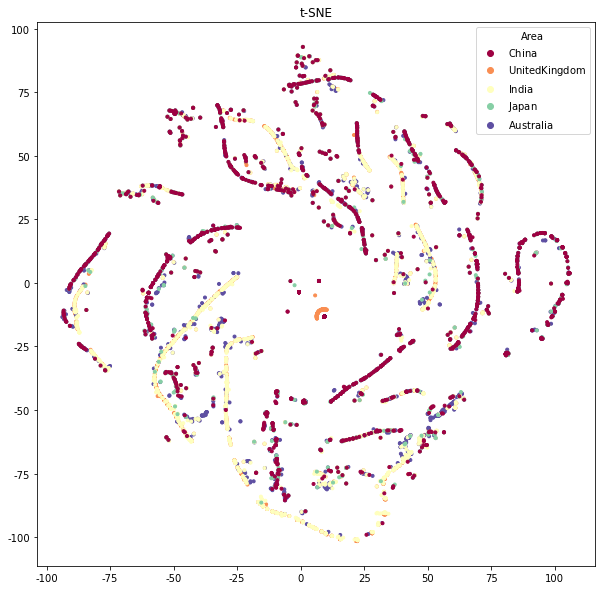

In [153]:
result_2D = tsne_2d.fit_transform(final_data_c[['N','M','S','E']])
le = preprocessing.LabelEncoder()
c = ['China','United_Kingdom','India','Japan','Australia']
le.fit(c)
label = le.fit_transform(final_data_c['tag'])
fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(result_2D[:,0],result_2D[:,1],marker='.',c=label,cmap=plt.cm.Spectral)
a,b = scatter.legend_elements()
b = ['$\\mathdefault{China}$','$\\mathdefault{United Kingdom}$',
     '$\\mathdefault{India}$','$\\mathdefault{Japan}$','$\\mathdefault{Australia}$']
#['Europe','Africa','North_America','Oceania','Asia','South_America','China','United_Kingdom','India','Japan','Australia']
legend1= ax.legend(a,b,title='Area',loc='best')
plt.title('t-SNE')
plt.savefig('t-SNE-Area.png',dpi=200)
plt.show()

In [139]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [140]:
newX = pca.fit_transform(final_data[['N','M','S','E']]) 

In [143]:
len(newX)

21098

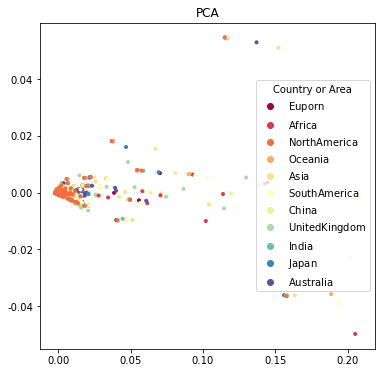

In [142]:
fig, ax = plt.subplots(figsize=(6,6))
scatter = ax.scatter(newX[:,0],newX[:,1],marker='.',c=label,cmap=plt.cm.Spectral)
a,b = scatter.legend_elements()
b = ['$\\mathdefault{Euporn}$','$\\mathdefault{Africa}$','$\\mathdefault{North America}$','$\\mathdefault{Oceania}$',
     '$\\mathdefault{Asia}$','$\\mathdefault{South America}$','$\\mathdefault{China}$','$\\mathdefault{United Kingdom}$',
     '$\\mathdefault{India}$','$\\mathdefault{Japan}$','$\\mathdefault{Australia}$']
#['Europe','Africa','North_America','Oceania','Asia','South_America','China','United_Kingdom','India','Japan','Australia']
legend1= ax.legend(a,b,title='Country or Area',loc='best')
plt.title('PCA')
plt.savefig('PCA.png',dpi=200)
plt.show()